In the Lecture 5 folder find 4 related to a heart disease databases (using class-lab5 start code)identify the  best model  to classify  data  (model can depend on a database). Justify your choice by comparing confusion matrices, ROC curves and AUC numbers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

<font color=blue> first let me introduce the function i created, which could be used frequently in the project.

In [2]:
#based on statistical significant of diff attributes in trainset 
#pick up number of attributes i want from both train set and test set
def attribute_selection(trainset_variable, trainset_dependent_variable, number_of_attribute, testset_variable):
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    # create the RFE model and select attributes
    rfe = RFE(model, number_of_attribute)
    rfe = rfe.fit(trainset_variable, trainset_dependent_variable)
    trian_variable_selection = []
    test_variable_selection = []
    train_variable_selection = [trainset_variable[:,i] for i in range(len(rfe.support_)) if rfe.support_[i] == True]
    test_variable_selection = [testset_variable[:,i] for i in range(len(rfe.support_)) if rfe.support_[i] == True]
    return train_variable_selection, test_variable_selection

In [3]:
#input the dataset and then outcome the result of prediction with each model
#the result follows the order: logistic regression, naive bayes alogrithm, knn, CART, SVM
def modeling(train_data, train_label, test_data, test_label):
    #logistic regression algorithm
    from sklearn.linear_model import LogisticRegression
    model_logistic = LogisticRegression()
    model_logistic.fit(train_data, train_label)
    # make predictions
    prediction_logistic = model_logistic.predict(test_data)
    score_logistic = model_logistic.predict_proba(test_data)
    result_log = [prediction_logistic, score_logistic]
    
    #naive bayes
    from sklearn.naive_bayes import GaussianNB
    model_nb = GaussianNB()
    model_nb.fit(train_data, train_label)
    # make predictions
    prediction_nb = model_nb.predict(test_data)
    score_nb = model_logistic.predict_proba(test_data)
    result_nb = [prediction_nb, score_nb]
    
    #knn
    from sklearn.neighbors import KNeighborsClassifier
    # fit a k-nearest neighbor model to the data
    model_knn = KNeighborsClassifier()
    model_knn.fit(train_data, train_label)
    # make predictions
    prediction_knn = model_knn.predict(test_data)
    score_knn = model_knn.predict_proba(test_data)
    result_knn = [prediction_knn, score_knn]
    
    #CART
    from sklearn.tree import DecisionTreeClassifier
    # fit a CART model to the data
    model_CART = DecisionTreeClassifier()
    model_CART.fit(train_data, train_label)
    # make predictions
    prediction_CART = model_CART.predict(test_data)
    score_CART = model_CART.predict_proba(test_data)
    result_cart = [prediction_CART, score_CART]
    
    #svm
    from sklearn.svm import SVC
    # fit a SVM model to the data
    model_svc = SVC(probability=True)
    model_svc.fit(train_data, train_label)
    # make predictions
    score_svc = model_svc.predict_proba(test_data)
    result_svm = [prediction_svc, score_svc]
    
    return result_log, result_nb, result_knn, result_cart, result_svm

In [4]:
#the fun sklearn give for get tpr and fpr for roc doesn't work well
#have to do it myself
def roc(y_true, y_score):
    tpr = np.zeros(len(y_true)+2)
    fpr = np.zeros(len(y_true)+2)
    count = np.append(y_score, max(y_score)+.5)
    count = np.append(count, min(y_score)-.5)
    count = np.sort(count)
    for i in range(len(count)):
        decision = np.zeros(len(y_score))
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        for j in range(len(y_score)):
            if (y_score[j] >= count[i]):
                decision[j] = 1
            else:
                decision[j] = 0
        for m in range(len(decision)):
            if decision[m] == y_true[m] and decision[m] == 1:
                tp = tp + 1
            else:
                if decision[m] == y_true[m] and decision[m] == 0:
                    tn = tn + 1
                else:
                    if decision[m] == 1:
                        fp = fp +1
                    else:
                        fn = fn +1
        tpr[i] = tp/(tp + fn)
        fpr[i] = fp/(fp + tn)
    return(fpr, tpr) 

In [5]:
#function for ploting the ROC curve
def plot_roc_curve(label, y_score,):
    from sklearn.metrics import roc_curve
    fpr, tpr = roc(label, y_score)
    
    co_ft = np.transpose(np.vstack((fpr, tpr)))
    co_ft = sorted(co_ft, key = lambda co_ft: co_ft[1])
    co_ft = sorted(co_ft, key = lambda co_ft: co_ft[0])
    fpr1,tpr1 = np.hsplit(np.asarray(co_ft),2)
    plt.plot(fpr1, tpr1, linewidth = 2, label = None)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([-0.01,1.01,-0.01,1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #attribute the result of auc 
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(label, y_score)
    text = 'auc equals to ' + str(round(auc,2))
    plt.title(text)

# part1 let's first model the small dataset

here i could use cleveland dataset as train dataset and use hungarian dataset as test dataset. Before modeling, i could standardize the data first.

In [6]:
data_cleveland = pd.read_table('cleveland-heart.txt', header=None, sep = ',')
data_hungarian = pd.read_table('hungarian-heart.txt', header=None, sep = ' ')

In [7]:
#i delete the row tha has '?'
data_cleveland = np.asarray(data_cleveland)
data_hungarian = np.asarray(data_hungarian)
data_hungarian = np.delete(data_hungarian, 294,0)

for i in range(13):
    j = 0
    while j < len(data_cleveland):
        if data_cleveland[j,i] == '?' :
            data_cleveland = np.delete(data_cleveland, j, 0)
        j = j + 1
        
for i in range(13):
    j = 0
    while j < len(data_hungarian):
        if data_hungarian[j,i] == '?' :
            data_hungarian = np.delete(data_hungarian, j, 0)
        j = j + 1

In [8]:
data_hungarian.shape

(294, 14)

In [9]:
#separate the variable and label
X_cleveland = np.asanyarray(data_cleveland)[:,0:12]
y_cleveland = np.asanyarray(data_cleveland)[:,13]

X_hungarian = np.asanyarray(data_hungarian)[:,0:12]
y_hungarian = np.asanyarray(data_hungarian)[:,13]

In [10]:
X_cleveland.shape

(297, 12)

In [8]:
y_cleveland = y_cleveland.astype('int')
y_hungarian = y_hungarian.astype('int')

X_cleveland = X_cleveland.astype('float')
X_hungarian = X_hungarian.astype('float')

In [9]:
from sklearn import preprocessing

# standardize the data attributes
X_cleveland = preprocessing.scale(X_cleveland)
X_hungarian = preprocessing.scale(X_hungarian)

In [10]:
#modeling
result_log, result_nb, result_knn, result_cart, result_svm = modeling(X_cleveland,y_cleveland, X_hungarian,y_hungarian)

In [11]:
#the confusion matrix of diff model
from sklearn import metrics
print(metrics.confusion_matrix(y_hungarian, result_log[0]))
print(metrics.confusion_matrix(y_hungarian, result_nb[0]))
print(metrics.confusion_matrix(y_hungarian, result_knn[0]))
print(metrics.confusion_matrix(y_hungarian, result_cart[0]))
print(metrics.confusion_matrix(y_hungarian, result_svm[0]))

[[170  13   2   3   0]
 [ 19   5   8   5   0]
 [  9   5  10   2   0]
 [  7   6  10   5   0]
 [  2   3   7   3   0]]
[[158  16   8   2   4]
 [ 15   9   8   4   1]
 [  6   6   9   5   0]
 [  6   5   9   4   4]
 [  1   2   5   5   2]]
[[172  14   2   0   0]
 [ 17  11   6   2   1]
 [  7  12   3   4   0]
 [  7  11   6   2   2]
 [  2   5   7   1   0]]
[[114  33  27  12   2]
 [  7  14  11   5   0]
 [  4   8   9   3   2]
 [  3   9  11   4   1]
 [  2   0   8   5   0]]
[[174  10   3   1   0]
 [ 23   5   8   1   0]
 [  8   5  10   3   0]
 [  8   4  11   5   0]
 [  3   2   8   2   0]]


<font color = blue  size = 4> the confusion matrix of each matrix looks good. The prediction can cover all states of heart disease. I think, CART is worse than other, since its preidction  accuracy on state '0' is not high and lots of wrong prediction on other state. 
SVM and Logistic works pretty well, though none of them can predict the state '4'

In [12]:
#to draw the roc curve, let's separate the prediction into two category, one is range from 0 to 2, representing 
#no or light heart disease; 3 and 4 are in another catergory representing heart disease
log_score = np.sum(result_log[1][:,3:5], axis = 1)
nb_score = np.sum(result_nb[1][:,3:5], axis = 1)
knn_score = np.sum(result_knn[1][:,3:5], axis = 1)
cart_score = np.sum(result_cart[1][:,3:5], axis = 1)
svm_score = np.sum(result_svm[1][:,3:5], axis = 1)

In [13]:
#also need to modify the label, 0~2 is negative while 3~4 is positive
roc_y_hungarian = np.zeros(len(y_hungarian))
for i in range(len(y_hungarian)):
    if y_hungarian[i] == 0 or y_hungarian[i] == 1 or y_hungarian[i] == 2:
        roc_y_hungarian[i] = 0
    else:
        roc_y_hungarian[i] = 1
        

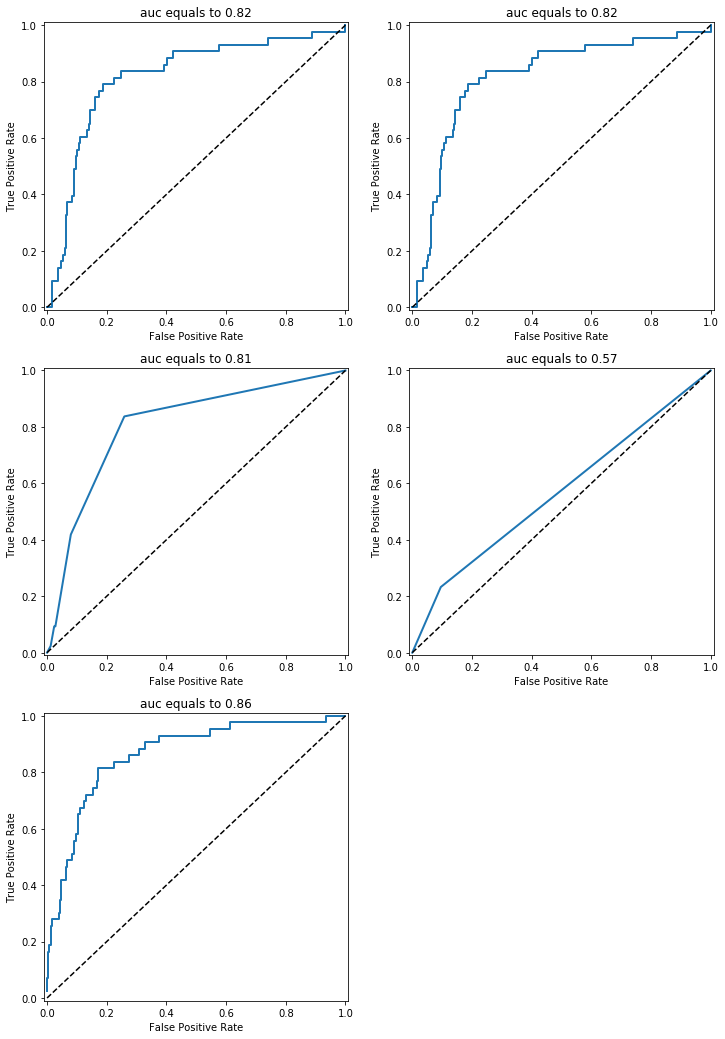

In [14]:
#the roc is on the top-left corner
plt.figure(num='model_comparasion',figsize=(12,18))

plt.subplot(321)
plot_roc_curve(roc_y_hungarian, log_score)

plt.subplot(322)
plot_roc_curve(roc_y_hungarian, nb_score)

plt.subplot(323)
plot_roc_curve(roc_y_hungarian, knn_score)

plt.subplot(324)
plot_roc_curve(roc_y_hungarian, cart_score)

plt.subplot(325)
plot_roc_curve(roc_y_hungarian, svm_score)
#sth strange happen to svm_roc

plt.show()

<font color = blue size = 4> as we can see from the table, with auc on the top, svm fits the data best while CART model is the worst. I think, at least for the small dataset, use SVM is a better choice.

# PART 2 let's model the big data set

here i could use the data of longbeach as train set and use data of switzerland as test data.
data is cleaned by Mac. 

In [11]:
data_switzerland = pd.read_table('full-switzerland-heart-edited.txt', header=None, sep = ',')
data_longbeach = pd.read_table('full-long-beach-heart-edited.txt', header=None, sep = ',')

Though the data is cleaned once, here i clean it again. I drop the last col, which is the 'name'. Also, i delete the col whose nan is more than 25% of the total value. For the col left, i use the median value of each col to fill the nan value.

In [12]:
data_longbeach.shape

(200, 76)

In [7]:
#separate the label and the variable
del(data_switzerland[75])
del(data_longbeach[75])
y_longbeach = data_longbeach[57]
y_switzerland = data_switzerland[57]
del(data_longbeach[57])
del(data_switzerland[57])

In [8]:
data_longbeach = np.asarray(data_longbeach)
data_switzerland = np.asarray(data_switzerland)

In [9]:
#i delete the row tha has more than 20% '-9', which means neither the train set or the test set, 
#col in one of them miss 20% data, i delete.
j = 0
while j < len(data_longbeach[0]):
    count = 0
    for i in range(len(data_longbeach)):
        if float(data_longbeach[i,j]) == -9.0:
            count = count + 1
    if count > .2*len(data_longbeach):
        data_longbeach = np.delete(data_longbeach, j, axis = 1)
        data_switzerland = np.delete(data_switzerland, j, axis = 1)
        j = j-1
    j = j+1

j = 0
while j < len(data_switzerland[0]):
    count = 0
    for i in range(len(data_switzerland)):
        if float(data_switzerland[i,j]) == -9.0:
            count = count + 1
    if count > .2*len(data_switzerland):
        data_longbeach = np.delete(data_longbeach, j, axis = 1)
        data_switzerland = np.delete(data_switzerland, j, axis = 1)
        j = j-1
    j = j+1

In [10]:
data_longbeach.shape

(200, 29)

In [13]:
#now try to fill in the nan value
#what i do is to replace the '-9' with the median value of the dataset
#first get the non nan value 
for i in range(29):
    count = []
    for j in range(len(data_longbeach)):
        if data_longbeach[j,i] != -9:
            count.append(data_longbeach[j,i])
    median_count = np.median(count)
    for j in range(len(data_longbeach)):
        if data_longbeach[j,i] == -9:
            data_longbeach[j,i] = median_count

In [57]:
#fill the nan
for i in range(29):
    count = []
    for j in range(len(data_switzerland)):
        if data_switzerland[j,i] != -9:
            count.append(data_switzerland[j,i])
    median_count = np.median(count)
    for j in range(len(data_switzerland)):
        if data_switzerland[j,i] == -9:
            data_switzerland[j,i] = median_count


In [58]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(data_longbeach, y_longbeach)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.03700573  0.          0.0421698   0.00389929  0.00351083  0.02612659
  0.01198852  0.01574079  0.02628459  0.02068835  0.04740279  0.03979553
  0.03455217  0.05454888  0.11275427  0.07279462  0.0126741   0.12859227
  0.0099376   0.05078333  0.01669613  0.11957655  0.02137998  0.
  0.00240127  0.00527585  0.03168175  0.01246731  0.03927111]


In [59]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(data_switzerland, y_switzerland)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.05655877  0.          0.0534585   0.00976884  0.02108864  0.01780191
  0.01599535  0.02960963  0.          0.01554358  0.04644319  0.03660003
  0.01888644  0.0510472   0.08182007  0.05061466  0.04037107  0.07963203
  0.07313792  0.03290333  0.0264496   0.07768825  0.04798774  0.00952367
  0.00089713  0.0059221   0.01235953  0.0344929   0.05339792]


In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 20)
rfe = rfe.fit(data_longbeach, y_longbeach)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True]
[ 8 10  7  1  1  1  1  1  9  3  4  6  5  1  1  1  1  1  1  1  1  1  1  1  1
  1  2  1  1]


In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 20)
rfe = rfe.fit(data_switzerland, y_switzerland)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False]
[ 8 10  5  1  1  1  1  1  9  2  3  7  4  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  6]


In [62]:
#pick up 15 important variable based on train set
X_longbeach, X_switzerland = attribute_selection(data_longbeach, y_longbeach, 15, data_switzerland)

In [63]:
#model
result_log, result_nb, result_knn, result_cart, result_svm = modeling(np.asarray(X_longbeach).T,y_longbeach, np.asarray(X_switzerland).T,y_switzerland)

In [64]:
from sklearn import metrics
print(metrics.confusion_matrix(y_switzerland, result_log[0]))
print(metrics.confusion_matrix(y_switzerland, result_nb[0]))
print(metrics.confusion_matrix(y_switzerland, result_knn[0]))
print(metrics.confusion_matrix(y_switzerland, result_cart[0]))
print(metrics.confusion_matrix(y_switzerland, result_svm[0]))

[[ 8  0  0  0  0]
 [48  0  0  0  0]
 [32  0  0  0  0]
 [30  0  0  0  0]
 [ 5  0  0  0  0]]
[[ 0  0  0  8  0]
 [ 0  6  0 42  0]
 [ 0  3  0 29  0]
 [ 0  0  0 30  0]
 [ 1  0  0  2  2]]
[[ 4  0  4  0  0]
 [11  0 37  0  0]
 [ 4  0 20  8  0]
 [ 0  0 10 20  0]
 [ 0  0  4  1  0]]
[[ 8  0  0  0  0]
 [ 1 47  0  0  0]
 [ 0  6 23  3  0]
 [ 0  0  7 23  0]
 [ 0  1  2  0  2]]
[[ 0  0  0  8  0]
 [ 0  0  0 48  0]
 [ 0  0  0 32  0]
 [ 0  0  0 30  0]
 [ 0  0  0  5  0]]


<font color = blue size = 3> the result is bad. the logistic and svm doesn't work at all ! I think CART model somehow work this time, and the result is pretty nice, but i think this is just luck.

In [65]:
#to draw the roc curve, let's separate the prediction into two category, one is range from 0 to 2, representing 
#no or light heart disease; 3 and 4 are in another catergory representing heart disease
log_score = np.sum(result_log[1][:,0:3], axis = 1)
nb_score = np.sum(result_nb[1][:,0:3], axis = 1)
knn_score = np.sum(result_knn[1][:,3:5], axis = 1)
cart_score = np.sum(result_cart[1][:,3:5], axis = 1)
svm_score = np.sum(result_svm[1][:,3:5], axis = 1)

In [66]:
#also need to modify the label, 0~2 is negative while 3~4 is positive
roc_y_switzerland = np.zeros(len(y_switzerland))
for i in range(len(y_switzerland)):
    if y_switzerland[i] == 0 or y_switzerland[i] == 1 or y_switzerland[i] == 2:
        roc_y_switzerland[i] = 0
    else:
        roc_y_switzerland[i] = 1

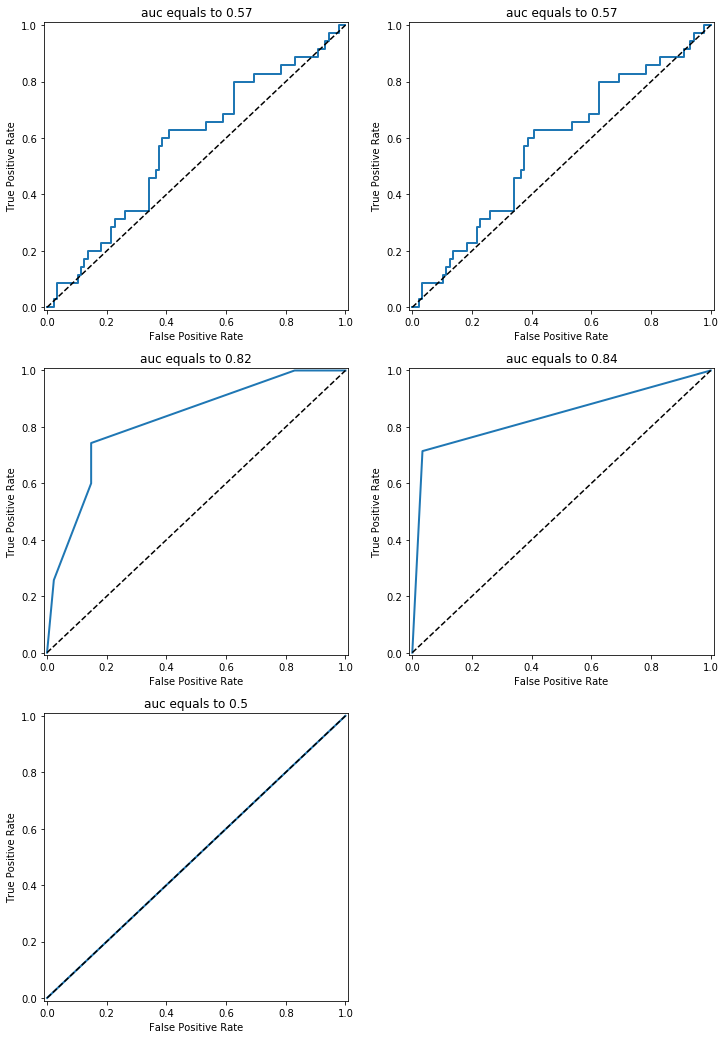

In [67]:
#the roc is on the top-left corner
plt.figure(num='model_comparasion',figsize=(12,18))

plt.subplot(321)
plot_roc_curve(roc_y_switzerland, log_score)

plt.subplot(322)
plot_roc_curve(roc_y_switzerland, nb_score)

plt.subplot(323)
plot_roc_curve(roc_y_switzerland, knn_score)

plt.subplot(324)
plot_roc_curve(roc_y_switzerland, cart_score)

plt.subplot(325)
plot_roc_curve(roc_y_switzerland, svm_score)
#sth strange happen to svm_roc

plt.show()

<font color = red size = 3> the roc curve and auc prove my opinion for confusion matrix, SVM doesn't even make sense here. In this big dataset, CART perform best. In conclusion, if i need to pick up a model for both small dataset and big dataset, i could choose KNN, since it could work in both big and small dataset

<font color = blue size = 3> For the big dataset, i didn't do the standarlization, the result was even worse with standarlization. Also, i think there are too many nan, which affects the performance of model. What's worse, in fact, the samples of these two dataset are not 'big', not enough to support it to train with so much variable. Another idea is that i think i should partly repeat the samples of state 3 and 4, because there aren't enough samples for these two situations, not even weight for them.  

<font color = blue size = 3>  one thing i feel confuse is that why the CART works bad on the small dataset but works not that bad in big data set ?

# PART 3 addendum

let's see how models performce if i set label = 0  if state is 0 and label = 1 if state isn't 0. Aslo, this time i train and test on the same dataset. 80% on the train set and 20% on the test set

In [31]:
#relabel
y_longbeach_new = np.zeros(len(y_longbeach))
y_switzerland_new = np.zeros(len(y_switzerland))

for i in range(len(y_longbeach)):
    if y_longbeach[i] == 0:
        y_longbeach_new[i] = 0
    else:
        y_longbeach_new[i] = 1

for i in range(len(y_switzerland)):
    if y_switzerland[i] == 0:
        y_switzerland_new[i] = 0
    else:
        y_switzerland_new[i] = 1

In [84]:
#standardize data
data_longbeach = preprocessing.scale(data_longbeach)
data_switzerland = preprocessing.scale(data_switzerland)

In [112]:
num1 = int(.5*len(data_longbeach))
num2 = int(.5*len(data_switzerland))
#break the dataset
data_longbeach_train = data_longbeach[:num1]
data_longbeach_test = data_longbeach[int(num1+1):]
y_longbeach_new_train = y_longbeach_new[:num1]
y_longbeach_new_test = y_longbeach_new[int(num1+1):]

data_switzerland_train = data_switzerland[:num2]
data_switzerland_test = data_switzerland[int(num2+1):]
y_switzerland_new_train = y_switzerland_new[:num2]
y_switzerland_new_test = y_switzerland_new[int(num2+1):]

In [113]:
#pick up 15 important variable based on train set
X_switzerland_train, X_switzerland_test = attribute_selection(data_switzerland_train, y_switzerland_new_train, 15, data_switzerland_test)
X_longbeach_train, X_longbeach_test = attribute_selection(data_longbeach_train, y_longbeach_new_train, 15, data_longbeach_test)

In [144]:
#model
result_log, result_nb, result_knn, result_cart, result_svm = modeling(np.asarray(X_longbeach_train).T,y_longbeach_new_train, np.asarray(X_longbeach_test).T,y_longbeach_new_test)

In [145]:
from sklearn import metrics
print(metrics.confusion_matrix(y_longbeach_new_test, result_log[0]))
print(metrics.confusion_matrix(y_longbeach_new_test, result_nb[0]))
print(metrics.confusion_matrix(y_longbeach_new_test, result_knn[0]))
print(metrics.confusion_matrix(y_longbeach_new_test, result_cart[0]))
print(metrics.confusion_matrix(y_longbeach_new_test, result_svm[0]))

[[25  0]
 [16 58]]
[[23  2]
 [ 3 71]]
[[24  1]
 [13 61]]
[[24  1]
 [ 3 71]]
[[20  5]
 [ 2 72]]


In [146]:
#to draw the roc curve, let's separate the prediction into two category, one is range from 0 to 2, representing 
#no or light heart disease; 3 and 4 are in another catergory representing heart disease
log_score = result_log[1][:,1]
nb_score = result_nb[1][:,1]
knn_score = result_knn[1][:,1]
cart_score = result_cart[1][:,1]
svm_score = result_svm[1][:,1]

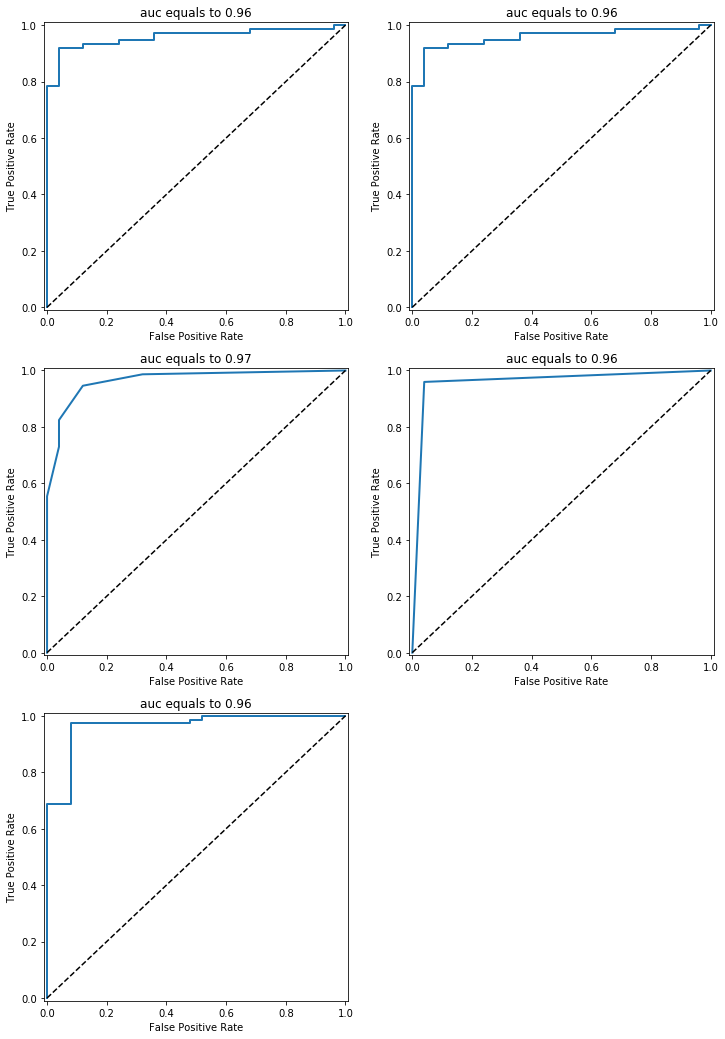

In [148]:
#the roc is on the top-left corner
plt.figure(num='model',figsize=(12,18))

plt.subplot(321)
plot_roc_curve(y_longbeach_new_test, log_score)

plt.subplot(322)
plot_roc_curve(y_longbeach_new_test, nb_score)

plt.subplot(323)
plot_roc_curve(y_longbeach_new_test, knn_score)

plt.subplot(324)
plot_roc_curve(y_longbeach_new_test, cart_score)

plt.subplot(325)
plot_roc_curve(y_longbeach_new_test, svm_score)
#sth strange happen to svm_roc

plt.show()

sometimes, the fpr and tpr value is incomplete with small dataset. Hence, the roc curve of knn and cart looks incomplete on the lift side, it doesn't connect the (0,0).  

the result looks good if i just train and test on longbeach dataset. what about switezerland ?

In [118]:
result_log, result_nb, result_knn, result_cart, result_svm = modeling(np.asarray(X_switzerland_train).T,y_switzerland_new_train, np.asarray(X_switzerland_test).T,y_switzerland_new_test)

In [119]:
print(metrics.confusion_matrix(y_switzerland_new_test, result_log[0]))
print(metrics.confusion_matrix(y_switzerland_new_test, result_nb[0]))
print(metrics.confusion_matrix(y_switzerland_new_test, result_knn[0]))
print(metrics.confusion_matrix(y_switzerland_new_test, result_cart[0]))
print(metrics.confusion_matrix(y_switzerland_new_test, result_svm[0]))

[[ 0  1]
 [ 5 55]]
[[ 0  1]
 [ 0 60]]
[[ 0  1]
 [ 3 57]]
[[ 0  1]
 [ 2 58]]
[[ 0  1]
 [ 0 60]]


In [128]:
log_score = result_log[1][:,1]
nb_score = result_nb[1][:,1]
knn_score = result_knn[1][:,1]
cart_score = result_cart[1][:,0]
svm_score = result_svm[1][:,1]

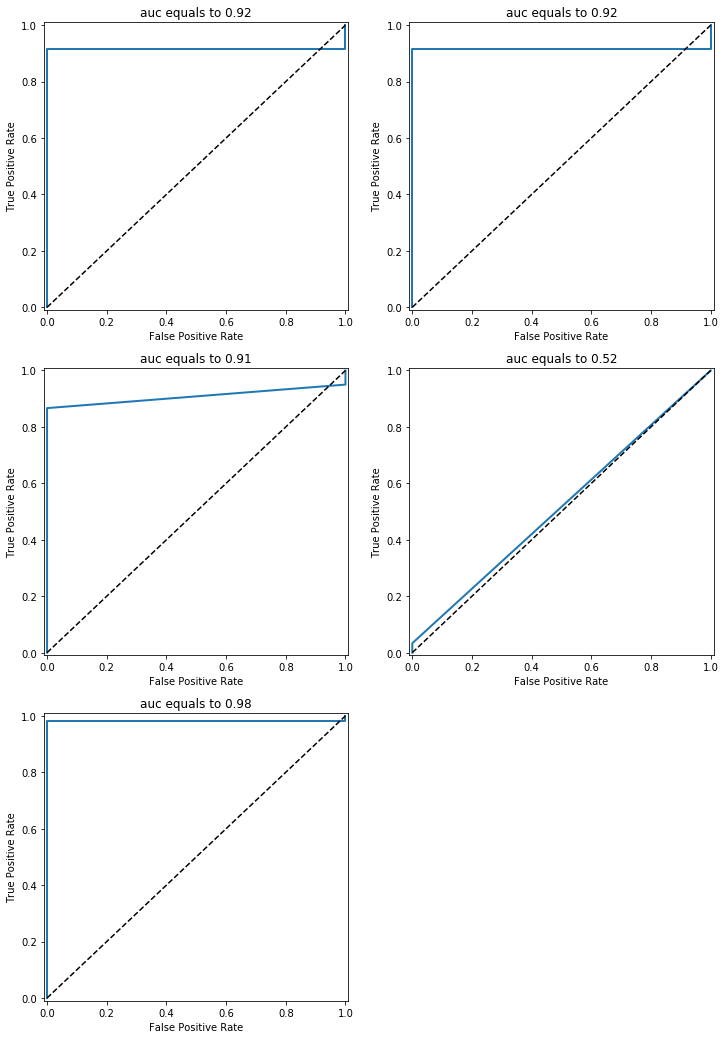

In [135]:
#the roc is on the top-left corner
plt.figure(num='model2',figsize=(12,18))

plt.subplot(321)
plot_roc_curve(y_switzerland_new_test, log_score)

plt.subplot(322)
plot_roc_curve(y_switzerland_new_test, nb_score)

plt.subplot(323)
plot_roc_curve(y_switzerland_new_test, knn_score)

plt.subplot(324)
plot_roc_curve(y_switzerland_new_test, cart_score)

plt.subplot(325)
plot_roc_curve(y_switzerland_new_test, svm_score)
#sth strange happen to svm_roc

plt.show()

look strange that cart's roc curve would be awful this time, but its confusion matrix isn't